- Samuele Centanni, samuele.centanni@studio.unibo.it, ID: 0001189752
- Mattia Lodi, mattia.lodi3@studio.unibo.it, ID: 0001176004
- Tomaž Cotič, tomaz.cotic@studio.unibo.it, ID: 0001180192  

# **Product Recognition of Books**

## Image Processing and Computer Vision - Assignment Module \#1


Contacts:

- Prof. Giuseppe Lisanti -> giuseppe.lisanti@unibo.it
- Prof. Samuele Salti -> samuele.salti@unibo.it
- Alex Costanzino -> alex.costanzino@unibo.it
- Francesco Ballerini -> francesco.ballerini4@unibo.it

Computer vision-based object detection techniques can be applied in library or bookstore settings to build a system that identifies books on shelves.

Such a system could assist in:
* Helping visually impaired users locate books by title/author;
* Automating inventory management (e.g., detecting misplaced or out-of-stock books);
* Enabling faster book retrieval by recognizing spine text or cover designs.

## Task
Develop a computer vision system that, given a reference image for each book, is able to identify such book from one picture of a shelf.

<figure>
<a href="https://ibb.co/pvLVjbM5"><img src="https://i.ibb.co/svVx9bNz/example.png" alt="example" border="0"></a>
</figure>

For each type of product displayed on the shelf, the system should compute a bounding box aligned with the book spine or cover and report:
1. Number of instances;
1. Dimension of each instance (area in pixel of the bounding box that encloses each one of them);
1. Position in the image reference system of each instance (four corners of the bounding box that enclose them);
1. Overlay of the bounding boxes on the scene images.

<font color="red"><b>Each step of this assignment must be solved using traditional computer vision techniques.</b></font>

#### Example of expected output
```
Book 0 - 2 instance(s) found:
  Instance 1 {top_left: (100,200), top_right: (110, 220), bottom_left: (10, 202), bottom_right: (10, 208), area: 230px}
  Instance 2 {top_left: (90,310), top_right: (95, 340), bottom_left: (24, 205), bottom_right: (23, 234), area: 205px}
Book 1 – 1 instance(s) found:
.
.
.
```

## Data
Two folders of images are provided:
* **Models**: contains one reference image for each product that the system should be able to identify;
* **Scenes**: contains different shelve pictures to test the developed algorithm in different scenarios.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/drive/MyDrive/AssignmentsIPCV/dataset.zip ./
!unzip dataset.zip

Mounted at /content/drive
Archive:  dataset.zip
   creating: dataset/
   creating: dataset/scenes/
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
   creating: dataset/models/
  inflating: dataset/scenes/scene_9.jpg  
  inflating: __MACOSX/dataset/scenes/._scene_9.jpg  
  inflating: dataset/scenes/scene_8.jpg  
  inflating: __MACOSX/dataset/scenes/._scene_8.jpg  
  inflating: dataset/scenes/scene_20.jpg  
  inflating: __MACOSX/dataset/scenes/._scene_20.jpg  
  inflating: dataset/scenes/scene_21.jpg  
  inflating: __MACOSX/dataset/scenes/._scene_21.jpg  
  inflating: dataset/scenes/scene_23.jpg  
  inflating: __MACOSX/dataset/scenes/._scene_23.jpg  
  inflating: dataset/scenes/scene_22.jpg  
  inflating: __MACOSX/dataset/scenes/._scene_22.jpg  
  inflating: dataset/scenes/scene_26.jpg  
  inflating: __MACOSX/dataset/scenes/._scene_26.jpg  
  inflating: dataset/scenes/scene_27.jpg  
  inflating: __MACOSX/dataset/scenes/._scene_27.jpg  
  inflating: datas

## Evaluation criteria
1. **Clarity and conciseness**. Present your work in a readable way: format your code and comment every important step;

2. **Procedural correctness**. There are several ways to solve the assignment. Design your own sound approach and justify every decision you make;

3. **Correctness of results**. Try to solve as many instances as possible. You should be able to solve all the instances of the assignment, however, a thoroughly justified and sound procedure with a lower number of solved instances will be valued **more** than a poorly designed and justified approach that solves more or all instances.

# Solution

##### Imports

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Dataset exploration


Before beginning to develop the solution, let's visualize the data we will use:

In [3]:
print(os.listdir('./dataset/models'))
print(os.listdir('./dataset/scenes'))

['model_6.png', 'model_12.png', 'model_16.png', 'model_19.png', 'model_7.png', 'model_18.png', 'model_3.png', 'model_21.png', 'model_11.png', 'model_5.png', 'model_9.png', '.DS_Store', 'model_14.png', 'model_8.png', 'model_4.png', 'model_15.png', 'model_10.png', 'model_1.png', 'model_2.png', 'model_17.png', 'model_0.png', 'model_13.png', 'model_20.png']
['scene_19.jpg', 'scene_6.jpg', 'scene_17.jpg', 'scene_4.jpg', 'scene_27.jpg', 'scene_8.jpg', 'scene_23.jpg', 'scene_21.jpg', 'scene_12.jpg', 'scene_5.jpg', 'scene_22.jpg', 'scene_26.jpg', 'scene_3.jpg', 'scene_0.jpg', 'scene_25.jpg', 'scene_24.jpg', 'scene_11.jpg', 'scene_13.jpg', 'scene_14.jpg', 'scene_2.jpg', 'scene_16.jpg', 'scene_28.jpg', 'scene_7.jpg', 'scene_18.jpg', 'scene_9.jpg', 'scene_20.jpg', 'scene_1.jpg', 'scene_10.jpg', 'scene_15.jpg']


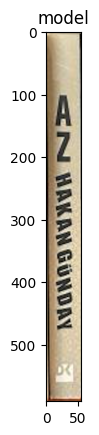

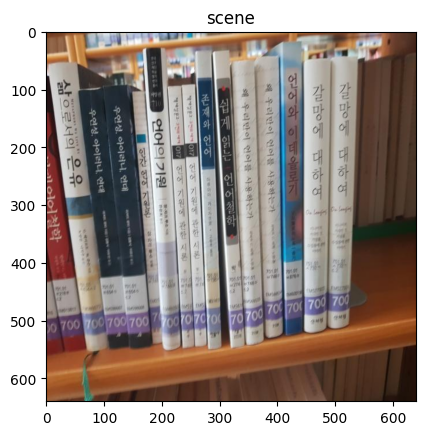

In [4]:
img_model = cv2.imread("./dataset/models/model_1.png", cv2.IMREAD_COLOR_RGB)
plt.imshow(img_model, "gray", vmin=0, vmax=255)
plt.title("model")
plt.show()

img_scene = cv2.imread("./dataset/scenes/scene_1.jpg", cv2.IMREAD_COLOR_RGB)
plt.imshow(img_scene, "gray", vmin=0, vmax=255)
plt.title("scene")
plt.show()


In [ ]:
# mean kpt per scene
kpts = []
for scene_n in range(22):
    scene_img = cv2.imread(f"./dataset/scenes/scene_{scene_n}.jpg", cv2.IMREAD_COLOR_RGB)
    sift = cv2.SIFT_create()
    kp_model = sift.detect(scene_img)
    kpts.append(len(kp_model))
print(f"keypt per scene: {kpts}")
print(f"avg keypt count: {np.mean(kpts)}")

# mean kpt per model
kpts = []
for model_n in range(22):
    model_img = cv2.imread(f"./dataset/models/model_{model_n}.png", cv2.IMREAD_COLOR_RGB)
    sift = cv2.SIFT_create()
    kp_model = sift.detect(model_img)
    kpts.append(len(kp_model))
print(f"keypt per model: {kpts}")
print(f"avg keypt count: {np.mean(kpts)}")

keypt per scene: [3315, 2322, 2391, 2209, 2566, 2033, 3530, 3818, 1385, 2636, 2367, 2659, 2380, 2239, 2065, 1878, 1939, 1808, 3589, 3888, 2835, 3651]
avg keypt count: 2613.7727272727275
keypt per model: [391, 347, 459, 744, 1306, 1267, 416, 364, 474, 474, 476, 389, 272, 661, 794, 799, 364, 439, 302, 286, 573, 793]
avg keypt count: 563.1818181818181


## Instance detection functions

### Functions to reject bad matches

These functions are in charge of discarding the instances found by the algorithm that aren't good matches. We want the resulting detections to:
- have a proper quadrilateral shape, which is indeed a property of books;
- not overlap with each other;
- be inside the image space of points, for obvious reasons.

In [ ]:
def compute_iou(box1, box2, iou_thresh):
    """Compute the IoU between 2 bounding boxes, a standard measure of the ratio of intersection to their areas"""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    inter_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    if inter_area == 0:
        return True

    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area < iou_thresh

def nms_iou(bboxes, iou_thresh=0.5):
    """Suppress boxes with an IoU lower than threshold"""
    if len(bboxes) == 0:
        return []
    bboxes = sorted(bboxes, key=lambda x: x[-1], reverse=True)
    selected = []
    while bboxes:
        best = bboxes.pop(0)
        selected.append(best)
        bboxes = [box for box in bboxes if compute_iou(best[:4], box[:4], iou_thresh)]
    return selected

def nms_containment(bboxes, contain_thresh=0.6):
    """Suppress boxes that are more than contain_thresh inside another box"""
    if len(bboxes) == 0:
        return []

    bboxes = sorted(bboxes, key=lambda x: x[4], reverse=True)
    selected = []

    def containment_ratio(inner, outer):
        x1 = max(inner[0], outer[0])
        y1 = max(inner[1], outer[1])
        x2 = min(inner[2], outer[2])
        y2 = min(inner[3], outer[3])

        inter_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
        inner_area = (inner[2] - inner[0] + 1) * (inner[3] - inner[1] + 1)
        if inner_area == 0:
            return 0.0
        return inter_area / inner_area

    while bboxes:
        best = bboxes.pop(0)
        selected.append(best)
        survivors = []
        for box in bboxes:
            if containment_ratio(box, best) > contain_thresh:
                continue
            survivors.append(box)
        bboxes = survivors

    return selected

def is_valid_quad(quad, min_area=20):
    """Check if a quadrilateral has a good shape"""
    quad = np.array(quad).reshape(-1, 2)
    # bounding box
    x1, y1 = np.min(quad, axis=0)
    x2, y2 = np.max(quad, axis=0)
    w, h = x2 - x1, y2 - y1
    if w <= 0 or h <= 0:
        return False
    # poygon check
    if not cv2.isContourConvex(quad):
        return False
    # area check
    area = cv2.contourArea(quad)
    if area < min_area:
        return False
    return True


### Function to locate the bounding box of instances of a model for a scene

The function ```locateInstances``` outputs the instances of a model found in a desired scene. The detection is made by computing and comparing SIFT descriptors, while the matching is done with the FLANN alg.  
This has proven to be by far the best method among the ones we implemented (rotation and scale invariant template matching, HoG descriptors, edge detection + DFT).  
The SIFT descriptors are invariant to many transformations, which is great for our task, but have an issue: are based on grayscale imgs, so if two models with the same shape have similar colors, then it is hard to distinguish them using SIFT descriptors. Among all the scenes, this problem was found only in the 18th and 27th.
As a workaround, we ran SIFT detection three times on the individual RGB channels, but this also failed to improve the results. When the channels differed significantly, the detections were unreliable; when the differences were small, the channels did not vary enough to produce distinct instances. Due to the ineffectiveness of this approach — and considering that the issue only occurred in scene 18 and 27 — we decided not to adopt it.

When a match is found the scene is updated by covering a slightly smaller region than the bounding box with black. The reduction is meant to account for imperfections in the detection and in the model countours.  


In [ ]:
def locateInstances(model_img, scene_img, sigma, min_match_count,
                    T, inlier_threshold, obscuring_threshold=0.9, max_instances=10):

    sift = cv2.SIFT_create(sigma=sigma)
    # SIFT keypt detection for the model
    kp_model, des_model = sift.detectAndCompute(model_img, None)
    masked_scene_img = scene_img.copy()

    detections = []
    for _ in range(max_instances):
        # SIFT keypt detection for the scene
        kp_scene, des_scene = sift.detectAndCompute(masked_scene_img, None)
        if des_scene is None or len(kp_scene) < 2:
            break

        # FLANN matcher
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(des_model, des_scene, k=2)

        # Lowe ratio test
        good = [m for m, n in matches if m.distance < T * n.distance]

        if len(good) > min_match_count:
            src_pts = np.float32([kp_model[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
            dst_pts = np.float32([kp_scene[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 4.0)
            if M is None:
                break
            inliers = mask.sum()
            if inliers < inlier_threshold:
                break

            # get quadrilateral in the scene
            h, w = model_img.shape[:2]
            pts = np.float32([[0,0], [0,h-1], [w-1,h-1], [w-1,0]]).reshape(-1, 1, 2)
            dst = cv2.perspectiveTransform(pts, M)
            quad = np.int32(dst).reshape(-1, 2)

            # coord control
            scene_h, scene_w = scene_img.shape[:2]
            if np.any(quad < 0) or np.any(quad[:, 0] > scene_w) or np.any(quad[:, 1] > scene_h):
                break

            # shape control
            if not is_valid_quad(quad):
                break

            # convert to bounding box
            x1, y1 = np.min(quad, axis=0)
            x2, y2 = np.max(quad, axis=0)
            detections.append([x1, y1, x2, y2, float(inliers), quad.tolist()])

            # mask detected region with a black polygon
            polygon = np.array(quad)
            centroid = np.mean(polygon, axis=0)
            shrunk_polygon = centroid + obscuring_threshold * (polygon - centroid)
            shrunk_polygon = shrunk_polygon.astype(np.int32)
            masked_scene_img = cv2.fillConvexPoly(masked_scene_img, shrunk_polygon, (0, 0, 0))
        else:
            break

    # apply NMS
    final_detections = nms_iou(detections)
    final_detections = nms_containment(final_detections)

    if len(final_detections) == 0:
        return []
    else:
        for i in range(len(final_detections)):
            final_detections[i] = final_detections[i][-1]
    return final_detections

## Books detection in the scenes

### Find the bounding boxes for all the scenes

Every scene is compared with every model to detect the instances bounding boxes, that are then stored in a dictionary.
All the models are read and stored before the detection to speed-up the computation.

In particular, we performed a grid search over the possible values of the `LocateInstance` function. Based on the total number of detected instances and on the accuracy of the results, we selected the following parameter configuration as the most effective:
- `sigma=0.5`: the sigma of the gaussian applied to the first octave
- `min_match_count=15`: the min num of keypts to detect a match
- `T=0.75`: threshold for the Lowe ratio test
- `inlier_threshold=10`: another threshold to prune irrelevant matches
- `obscuring_threshold=0.9`: the percentage of shrinking w.r.t. the bounding box
- `max_instances=10`: max possible detected instances, an upper bound necessary to avoid inifite looping

In [ ]:
best_params = {'sigma': 0.5, 'T': 0.75, 'min_match_count': 15, 'inlier_threshold': 10}

scene_names = os.listdir('./dataset/scenes')
model_names = os.listdir('./dataset/models')

scene_names.sort()
model_names.sort()

scene_bb = {}
models_img = []

for model_n in range(22):
    model_img = cv2.imread(f"./dataset/models/model_{model_n}.png", cv2.IMREAD_COLOR_RGB)
    models_img.append(model_img)

for scene_n in range(29):
    scene_img = cv2.imread(f"./dataset/scenes/scene_{scene_n}.jpg", cv2.IMREAD_COLOR_RGB)
    for model_n in range(22):
        instances_bb = locateInstances(cv2.cvtColor(models_img[model_n], cv2.COLOR_BGR2GRAY),
                               cv2.cvtColor(scene_img, cv2.COLOR_BGR2GRAY), **best_params, obscuring_threshold=0.9)
        l = len(instances_bb)
        if l > 0:
            if scene_n not in scene_bb:
                scene_bb[scene_n] = []
            scene_bb[scene_n].append({model_n:instances_bb})
        else:
            if scene_n not in scene_bb:
                scene_bb[scene_n] = []

print(scene_bb)

{0: [], 1: [{18: [[[441, 41], [441, 520], [489, 520], [490, 42]], [[489, 39], [482, 515], [530, 515], [536, 40]]]}], 2: [{17: [[[283, 25], [283, 503], [318, 503], [318, 25]]]}], 3: [{16: [[[377, 209], [377, 542], [425, 542], [425, 209]], [[425, 210], [418, 549], [467, 547], [474, 209]]]}], 4: [{14: [[[92, 1], [92, 617], [135, 617], [135, 1]]]}, {15: [[[226, 48], [226, 608], [267, 608], [267, 48]], [[191, 44], [196, 609], [239, 609], [234, 44]]]}], 5: [{13: [[[102, 70], [102, 572], [145, 572], [145, 69]]]}], 6: [{21: [[[217, 73], [217, 563], [270, 563], [270, 73]]]}], 7: [{20: [[[236, 173], [236, 555], [289, 555], [289, 173]], [[279, 171], [275, 559], [330, 562], [334, 170]]]}], 8: [], 9: [{19: [[[433, 328], [137, 339], [137, 366], [438, 355]], [[439, 356], [135, 366], [141, 393], [439, 383]], [[438, 382], [141, 392], [139, 420], [443, 410]], [[443, 301], [130, 310], [142, 340], [435, 332]]]}], 10: [{19: [[[331, 203], [331, 504], [359, 503], [359, 203]], [[385, 201], [385, 497], [414, 5

### Correct formatting of the detection list

Below, we provide the detection list in the required format, where each detected book in the scene is accompanied by its bounding box coordinates and area.

In [ ]:
def formatBb(bb):
    bb = np.array(bb).reshape(4,2)
    area = 0.5 * abs(
        bb[0][0]*bb[1][1] + bb[1][0]*bb[2][1] + bb[2][0]*bb[3][1] + bb[3][0]*bb[0][1] -
        (bb[0][1]*bb[1][0] + bb[1][1]*bb[2][0] + bb[2][1]*bb[3][0] + bb[3][1]*bb[0][0])
    )
    return "{"+f"top_left: ({bb[0][0]},{bb[0][1]}), top_right: ({bb[3][0]}, {bb[3][1]}), bottom_left: ({bb[1][0]}, {bb[1][1]}), bottom_right: ({bb[2][0]}, {bb[2][1]}), area: {int(area)}px"+"}"

def prettyPrint(scene_bb):
    for scene in list(scene_bb.keys()):
        print(f"Scene {scene}:")
        if(len(scene_bb[scene]) == 0):
            print("  No instances found")
        else:
            for i, x in enumerate(scene_bb[scene]):
                model = list(x.keys())[0]
                print(f"Book {model} - {len(scene_bb[scene][i][model])} instance(s) found:")
                for j,instance in enumerate(scene_bb[scene][i][model]):
                    print(f"  Instance {j} {formatBb(scene_bb[scene][i][model][j])}")

prettyPrint(scene_bb)

Scene 0:
  No instances found
Scene 1:
Book 18 - 2 instance(s) found:
  Instance 0 {top_left: (441,41), top_right: (490, 42), bottom_left: (441, 520), bottom_right: (489, 520), area: 23207px}
  Instance 1 {top_left: (489,39), top_right: (536, 40), bottom_left: (482, 515), bottom_right: (530, 515), area: 22589px}
Scene 2:
Book 17 - 1 instance(s) found:
  Instance 0 {top_left: (283,25), top_right: (318, 25), bottom_left: (283, 503), bottom_right: (318, 503), area: 16730px}
Scene 3:
Book 16 - 2 instance(s) found:
  Instance 0 {top_left: (377,209), top_right: (425, 209), bottom_left: (377, 542), bottom_right: (425, 542), area: 15984px}
  Instance 1 {top_left: (425,210), top_right: (474, 209), bottom_left: (418, 549), bottom_right: (467, 547), area: 16576px}
Scene 4:
Book 14 - 1 instance(s) found:
  Instance 0 {top_left: (92,1), top_right: (135, 1), bottom_left: (92, 617), bottom_right: (135, 617), area: 26488px}
Book 15 - 2 instance(s) found:
  Instance 0 {top_left: (226,48), top_right: (2

### Display of the object detection
We now overlap the found bounding boxes in the previous step with the corresponding scenes to visually asses the correctness of the algorithm.

Scene 0:
  No instances found


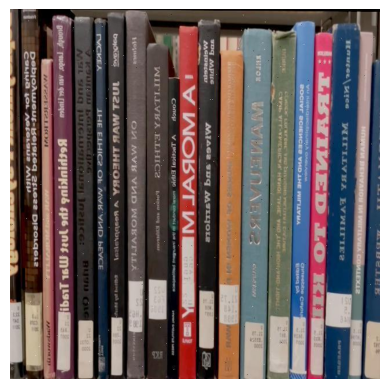

Scene 1:
  2 model 18 found:


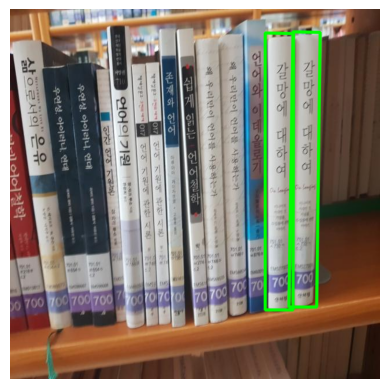

Scene 2:
  1 model 17 found:


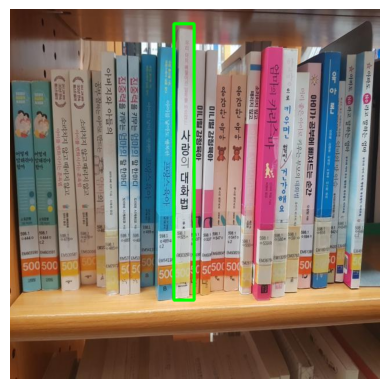

Scene 3:
  2 model 16 found:


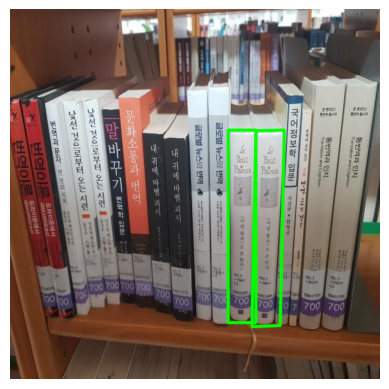

Scene 4:
  1 model 14 found:
  2 model 15 found:


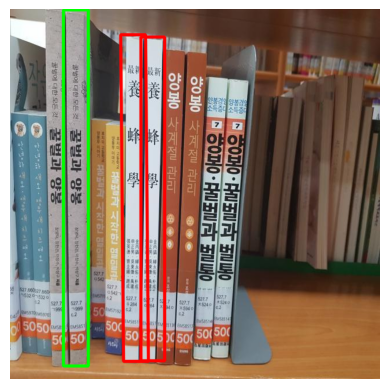

Scene 5:
  1 model 13 found:


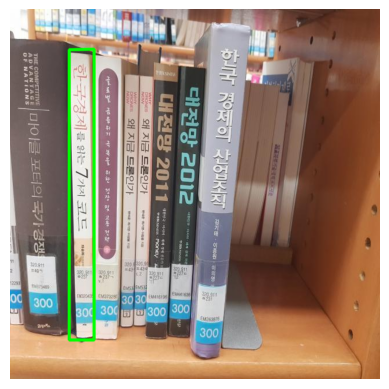

Scene 6:
  1 model 21 found:


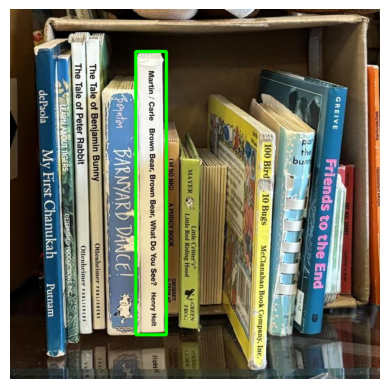

Scene 7:
  2 model 20 found:


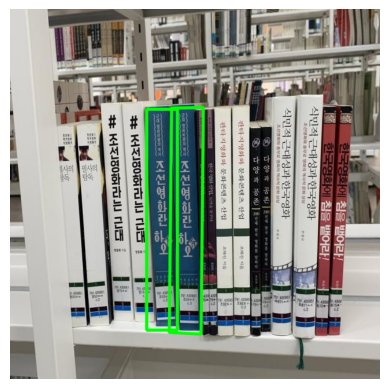

Scene 8:
  No instances found


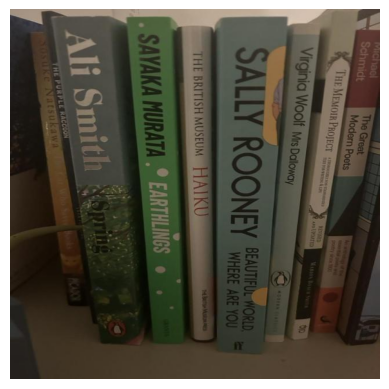

Scene 9:
  4 model 19 found:


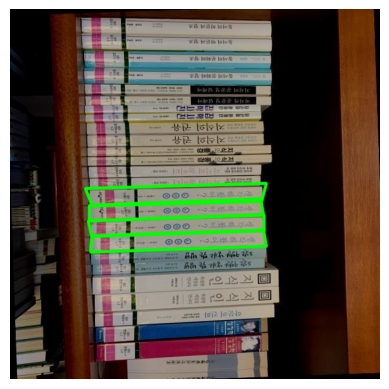

Scene 10:
  4 model 19 found:


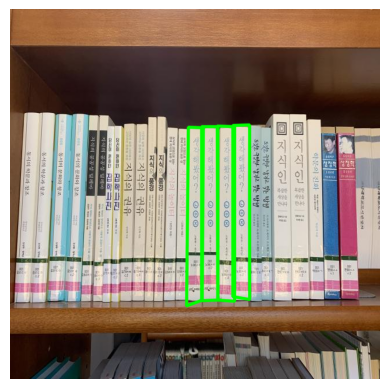

Scene 11:
  No instances found


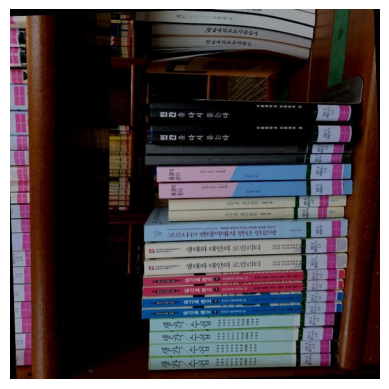

Scene 12:
  No instances found


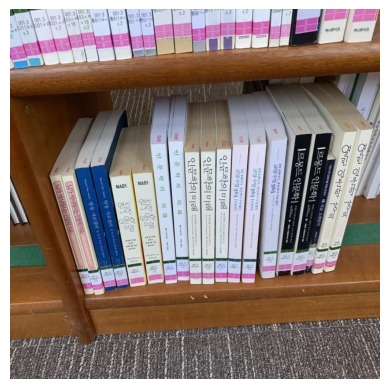

Scene 13:
  No instances found


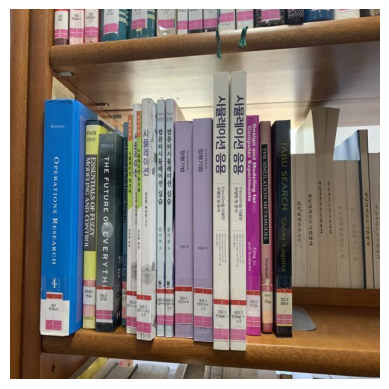

Scene 14:
  No instances found


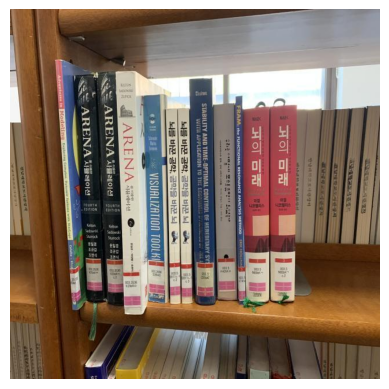

Scene 15:
  2 model 11 found:
  3 model 12 found:


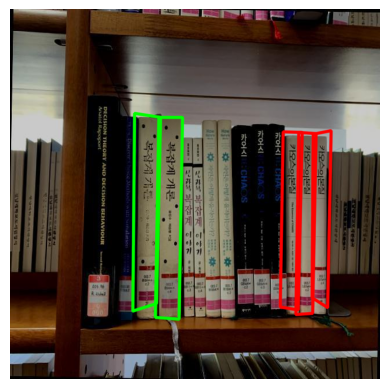

Scene 16:
  2 model 11 found:
  3 model 12 found:


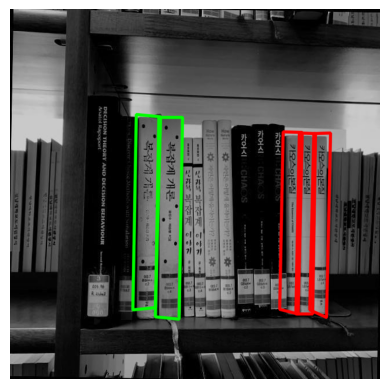

Scene 17:
  2 model 11 found:
  3 model 12 found:


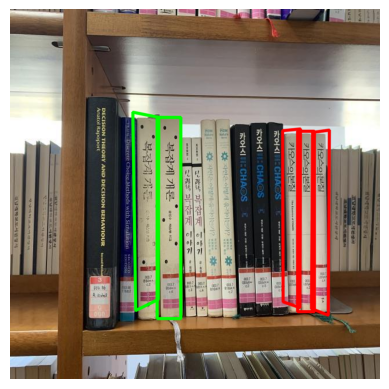

Scene 18:
  3 model 8 found:
  3 model 9 found:
  3 model 10 found:


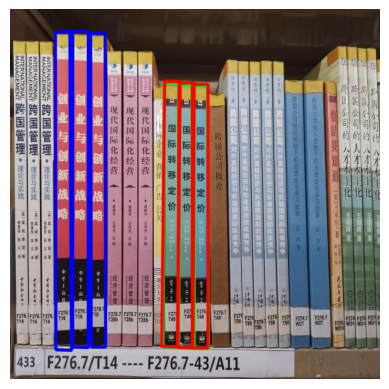

Scene 19:
  3 model 6 found:
  2 model 7 found:


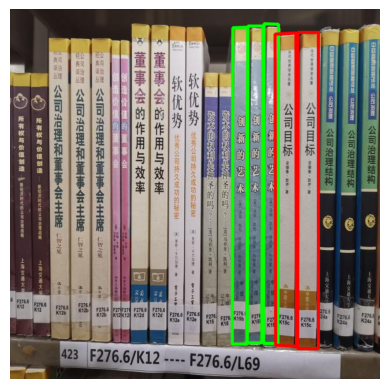

Scene 20:
  No instances found


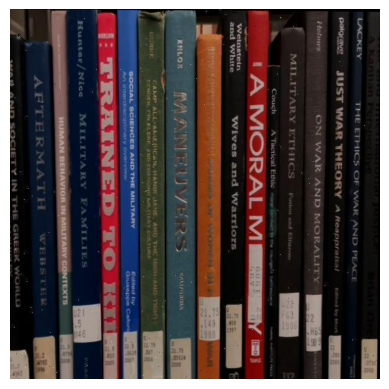

Scene 21:
  No instances found


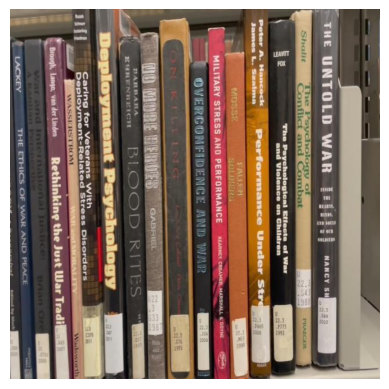

Scene 22:
  No instances found


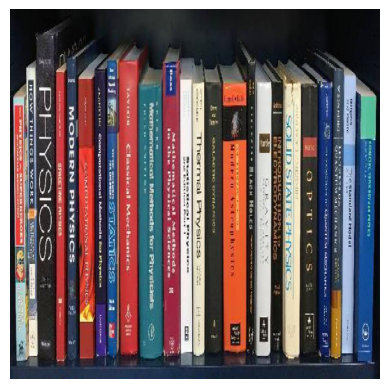

Scene 23:
  1 model 5 found:


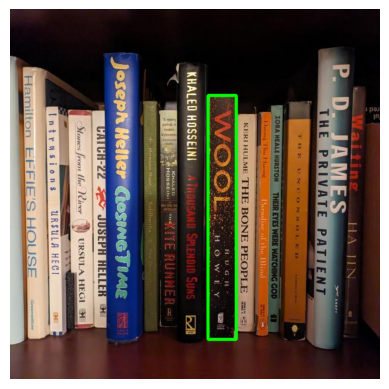

Scene 24:
  No instances found


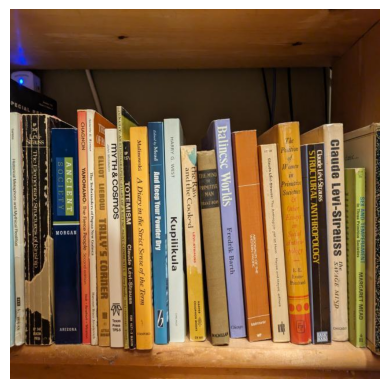

Scene 25:
  No instances found


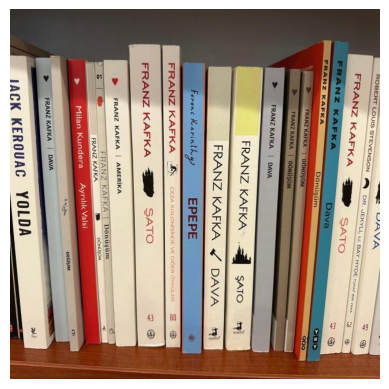

Scene 26:
  2 model 0 found:
  1 model 4 found:


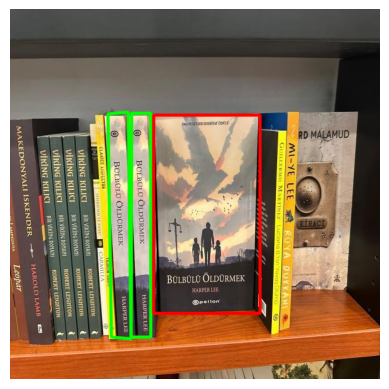

Scene 27:
  5 model 2 found:
  4 model 3 found:


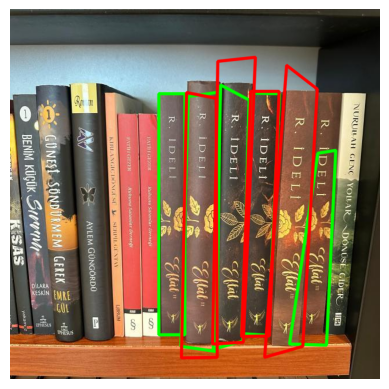

Scene 28:
  2 model 1 found:


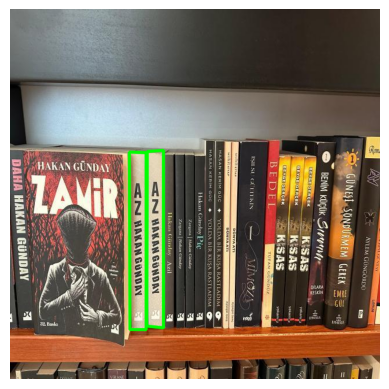

In [ ]:
def showScenesBB(scene_bb):
    for scene in sorted(scene_bb.keys()):
        img = cv2.imread(f"./dataset/scenes/scene_{scene}.jpg", cv2.IMREAD_COLOR_RGB)
        print(f"Scene {scene}:")
        if len(scene_bb[scene]) == 0:
            print("  No instances found")
        else:
            sorted_books = sorted(scene_bb[scene], key=lambda d: list(d.keys())[0])
            for i, x in enumerate(sorted_books):
                model = list(x.keys())[0]
                print(f"  {len(x[model])} model {model} found:")

                bbs = [np.array(bb, dtype=np.int32).reshape(-1, 1, 2) for bb in x[model]]
                if i == 0:
                    color = (0,255,0)
                elif i == 1:
                    color = (255,0,0)
                elif i == 2:
                    color = (0,0,255)
                else:
                    color = (255,255,255)

                img = cv2.polylines(img, bbs, True, color, 3, cv2.LINE_AA)

        plt.imshow(img)
        plt.axis('off')
        plt.show()
        img = None

showScenesBB(scene_bb)